Deployment of the Building model
---
After model built, it is one step left to complete the work: Deployment for Service. 

### Save result
```python
final_cat = finalize_model(cat_model)
save_model(final_cat, 'fastapi/deployment_20221101_1')
```
Deployment of project includes three layers:
```

Front-end UI. <----> Deployment <----> Model

```
Here, we introduce the Streamlit package to deploy the application, including UI and web app itself.

1. Create the following file, `app.py`, in certain sub-folder:

```python
### app.py
# required packages

import streamlit as st
from pycaret.regression import load_model, predict_model

# load model pkl for prediction
model = load_model('deployment_20221101_1')

# Web Page title
st.title('Laptop Prices Predictor')

# selection input
Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

# numerical input 
ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)

# radio input
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
...

features=[Company_of_laptop, ram_in_gb, touchscreen, ...]
final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {prediction[0]}')
```

And startup the service by follows:

 > streamlit run app.py


In [ ]:
from pycaret.regression import *

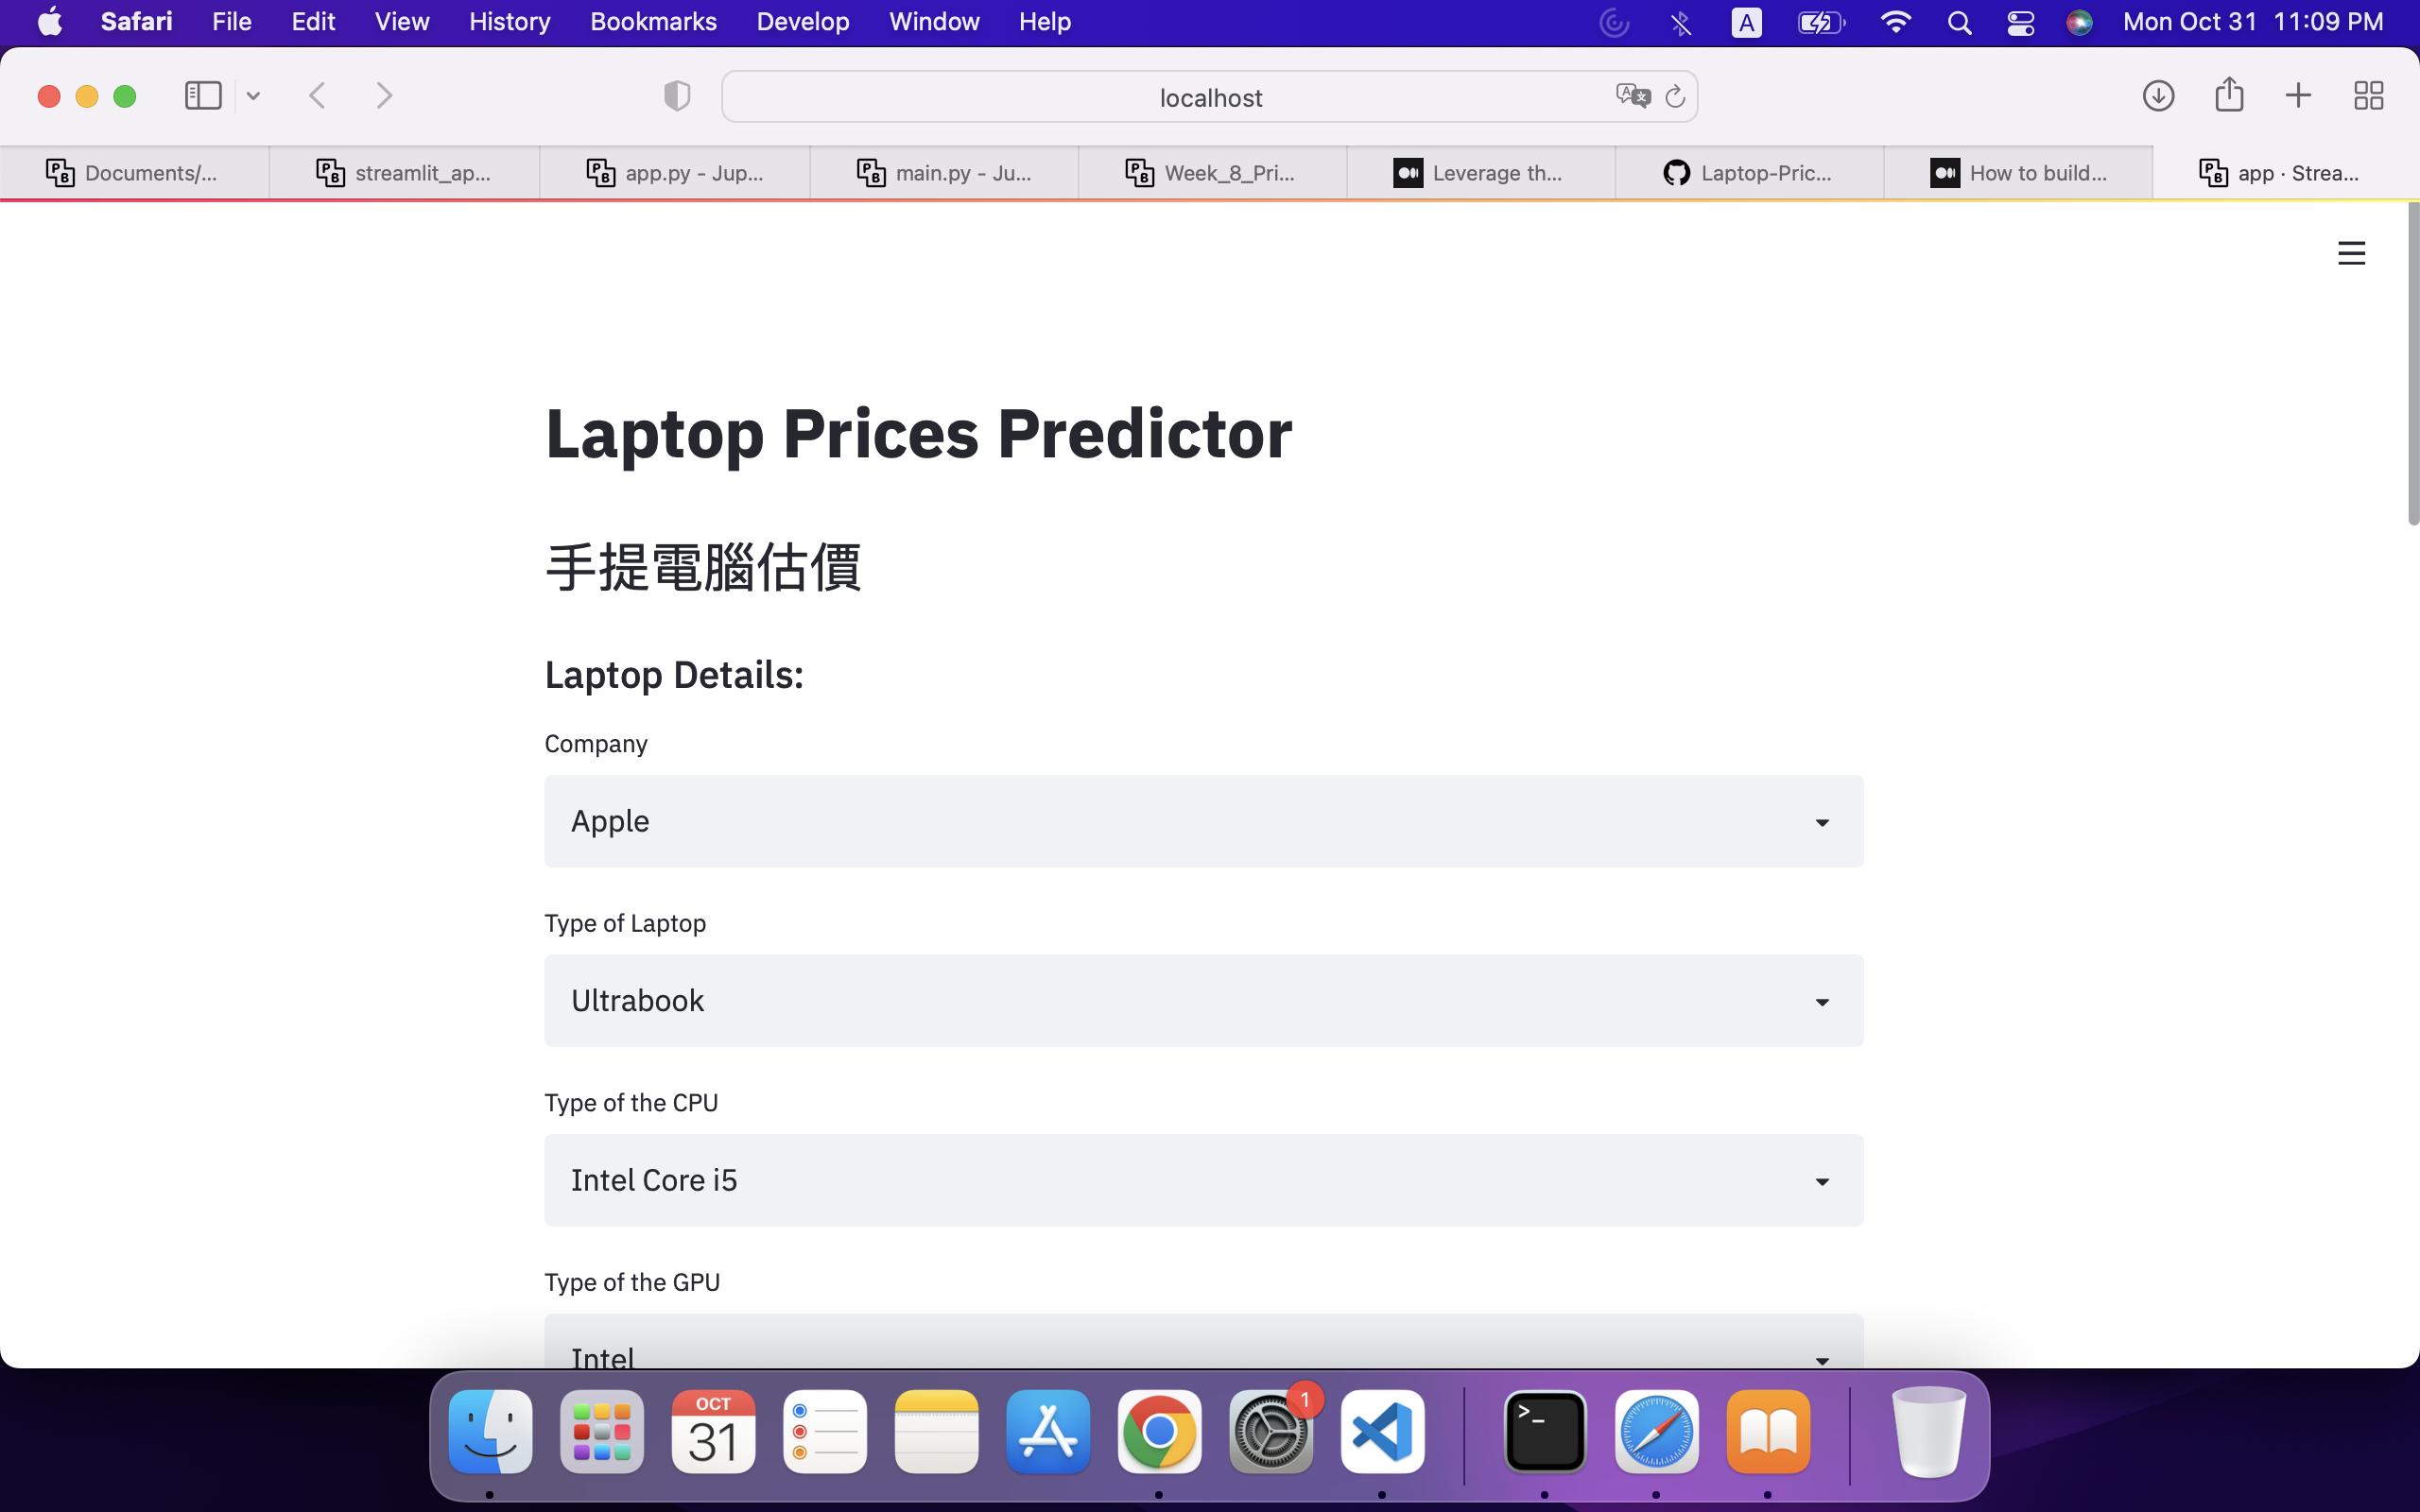

In [1]:
from IPython.display import Image
Image("laptop.png")

Project Structure
---
```
porject folder
              ➜ app.py
              ➜ deployment_20221101_1.pkl
              ➜ Laptop_price_EDA.csv
```
### app.py
```python

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import sklearn
from pycaret.regression import load_model, predict_model

df = pd.read_csv('Laptop_price_EDA.csv')
st.title('Laptop Prices Predictor ')

# load model in pkl
model = load_model('deployment_20221101_1')

st.markdown( "## 手提電腦估價")
st.subheader('Laptop Details:')

# features considered in model
features_=['Company_name_encoded', 'TypeName_name_encoded',
           'Cpu_brand_name_encoded', 'CPU_vel', 'GPU_name_encoded', 'Ram',
           'first_type_name_encoded', 'first_size', 'second_type_name_encoded',
           'second_size', 'Touchscreen', 'Ips', 'Inches', 'ppi', 'os_name_encoded',
           'Price']

def label_dict(df_,feature,label_='_name_encoded'):
    feature_lab=feature+label_
    return {k: v for k, v in zip(df_[feature].unique(), df_[feature_lab].unique() )}

def select_type(opt,feature_opt):
    dic_=df_lab.loc[df_lab.index==feature_opt,'label'][0]
    return dic_[opt]

cat_f=['Company', 'TypeName','Cpu_brand', 'GPU', 'first_type', 'second_type','os']

label_array=[]
for cat in cat_f:
    cat_=label_dict(df,cat) 
    label_array.append(cat_)

df_lab=pd.DataFrame(index=cat_f)
df_lab['label']=label_array    

Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

TypeName=st.selectbox("Type of Laptop", options=df["TypeName"].unique())
TypeName_of_laptop = select_type(TypeName,'TypeName')

Cpu_brand = st.selectbox("Type of the CPU", options=df["Cpu_brand"].unique())
Cpu_brand_of_laptop = select_type(Cpu_brand,'Cpu_brand')

GPU = st.selectbox("Type of the  GPU", options=df["GPU"].unique())
GPU_of_laptop = select_type(GPU,'GPU')

first_type = st.selectbox("First Storage", options=df["first_type"].unique())
first_type_of_laptop = select_type(first_type,'first_type')

second_type = st.selectbox("Second Storage", options=df["second_type"].unique())
second_type_of_laptop = select_type(second_type,'second_type')

os = st.selectbox("Operation System", options=df["os"].unique())
os_of_laptop = select_type(os,'os')

ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)
size_in_inches = st.number_input('Size of the laptop in Inches', step=0.1, min_value=10.0)
CPU_vel = st.number_input('Velocity of CPU', step=0.4, min_value=1.0)
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
Ips  = st.radio("IPS Screen (0-No,1-Yes)", options=[0, 1])

ppi = st.number_input('Revolustion of ppi', step=10, min_value=90)
first_size = st.number_input('Size of First Storage', step=32, min_value=32)
second_size = st.number_input('Size of Second Storage', step=32, min_value=0)

features=[Company_of_laptop, TypeName_of_laptop, Cpu_brand_of_laptop, CPU_vel, GPU_of_laptop, ram_in_gb, \
          first_type_of_laptop, first_size, second_type_of_laptop, second_size, \
          touchscreen, Ips, size_in_inches, ppi, os_of_laptop]
# convert list to one of element of list
# [...] ➜ [[...]]

final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {int(prediction[0])}')
```

Docker
---
1. requirements.txt
```
streamlit==1.14.0
numpy==1.22.4
pandas==1.4.4
pycaret==3.0.0rc4
catboost==1.1

```
2. Dockerfile

```
# frontent/Dockerfile

FROM python:3.8

COPY requirements.txt 

WORKDIR /app

RUN pip install -r requirements.txt

COPY . /app

EXPOSE 8501

ENTRYPOINT ["streamlit","run"]
CMD ["app.py"]
```

3. activate docker server, create docker, and test:

```shell
docker build -t mystapp:latest .
docker run -p 8501:8501 mystapp:latest
```
4. Share and run the local deploy by the last command.

In [1]:
import streamlit
streamlit.__version__

'0.81.1'

In [2]:
import numpy
numpy.__version__


'1.23.4'

In [3]:
import pandas
pandas.__version__

'1.5.1'

## Fastapi + streamlit, and Docker